# 1. Importing the necessary libraries and importing the datatset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv(r"/kaggle/input/dataset-for-mobile-price-prediction-multi-class/mobile_price_train.csv")
test_data=pd.read_csv(r"/kaggle/input/dataset-for-mobile-price-prediction-multi-class/mobile_price_test.csv")

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train_data['price_range'].unique()

array([1, 2, 3, 0])

# 2. Importing the necessary machine learning libraries

In [6]:
from sklearn.preprocessing import StandardScaler, PowerTransformer,RobustScaler,MinMaxScaler,QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 3. Plotting the columns to visualize the distribution of column

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

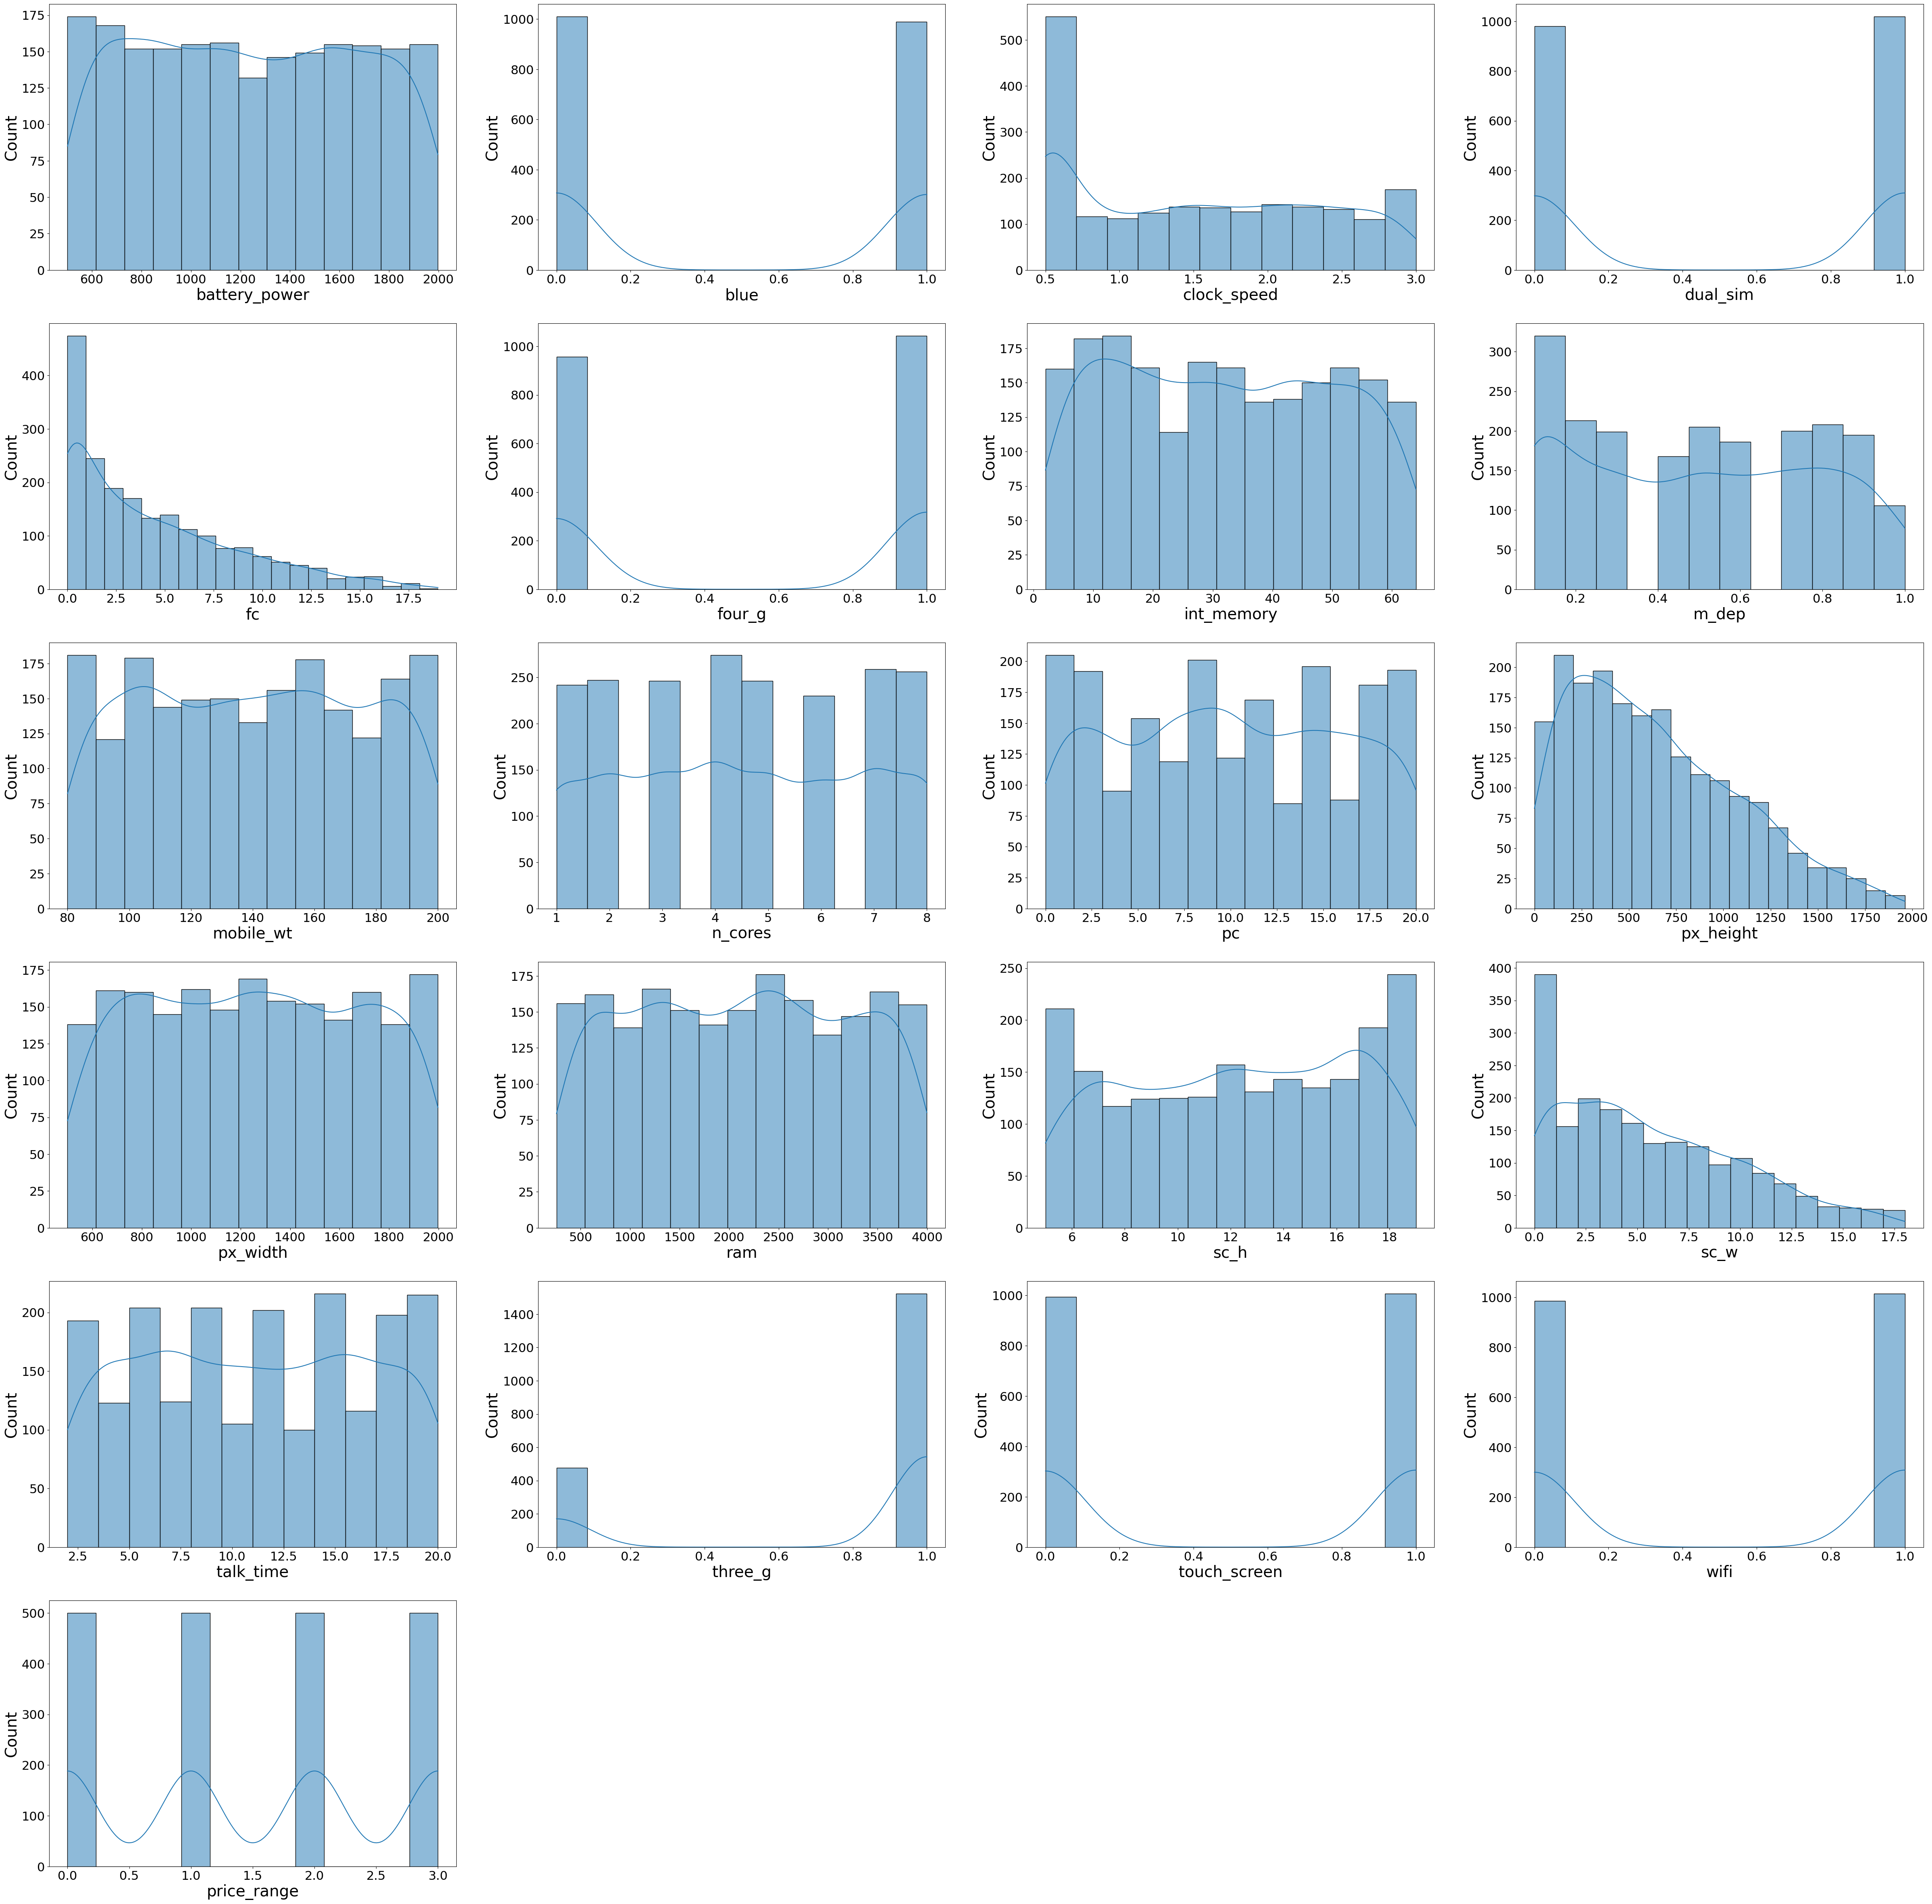

In [7]:
plt.figure(figsize=(60,60))
plotnumber=1

for column in train_data:
    if plotnumber<=21:
        ax=plt.subplot(6,4,plotnumber)
        sns.histplot(train_data[column],kde=True)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.xlabel(column,fontsize=28)
        plt.ylabel('Count',fontsize=28)
    plotnumber +=1
plt.show()

# 4. Selecting the x and y varaibles

In [8]:
x=train_data.drop(columns=['price_range'])
y=train_data['price_range']

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 5. Doing the train-test split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [11]:
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
from sklearn.linear_model import LogisticRegression

# 6. Initiating the Logistic Regression function and training the model

In [14]:
classifier_multinomial=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
classifier_multinomial.fit(x_scaled_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

# 7. Calculating the ROC_AUC score, model score and y_pred values

In [15]:
y_score_multinomial=classifier_multinomial.predict_proba(x_scaled_test)

In [16]:
auc_multinomial=roc_auc_score(y_test,y_score_multinomial,multi_class='ovr')
auc_multinomial

0.9984695368960149

In [17]:
classifier_multinomial.score(x_scaled_train,y_train)

0.9733333333333334

In [18]:
classifier_multinomial.score(x_scaled_test,y_test)

0.962

In [19]:
y_score_multi=classifier_multinomial.predict(x_scaled_test)
y_score_multi

array([0, 2, 0, 3, 1, 0, 2, 3, 2, 0, 0, 2, 1, 2, 3, 2, 1, 0, 2, 3, 2, 0,
       3, 0, 3, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 3, 3, 2, 3, 3, 0, 3, 2, 3,
       0, 0, 2, 2, 3, 1, 2, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 0, 2, 0, 3, 3,
       3, 2, 0, 1, 1, 3, 2, 0, 0, 2, 2, 3, 1, 2, 3, 0, 2, 3, 3, 3, 2, 2,
       2, 1, 0, 1, 1, 0, 0, 1, 3, 3, 3, 3, 2, 0, 3, 2, 1, 2, 1, 1, 3, 0,
       3, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 3, 2, 3, 0, 1, 3, 3, 1, 0,
       2, 3, 1, 0, 2, 1, 1, 1, 1, 1, 3, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 3,
       2, 2, 2, 2, 1, 0, 3, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 3, 0, 3,
       1, 2, 2, 3, 3, 0, 1, 2, 3, 0, 0, 2, 3, 3, 1, 1, 0, 2, 0, 3, 0, 2,
       2, 1, 1, 1, 3, 0, 1, 3, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 1, 0, 0, 3,
       0, 1, 2, 3, 2, 0, 0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 0, 3, 1, 1, 2, 1,
       3, 2, 2, 2, 2, 1, 2, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 3, 3, 1, 3, 1, 1, 3, 3, 2, 0, 0, 1, 2,
       0, 0, 2, 3, 0, 0, 1, 0, 2, 0, 3, 1, 2, 0, 0,

In [20]:
y_prob=classifier_multinomial.predict_proba(x_scaled_test)[:,1]

In [21]:
y_prob

array([1.22701173e-01, 8.52600751e-03, 1.27477258e-02, 2.12586012e-10,
       9.19349948e-01, 9.46408664e-03, 1.71973236e-01, 2.85781141e-05,
       1.22244581e-02, 6.14062783e-02, 2.01939197e-02, 2.85993343e-02,
       8.73485019e-01, 3.04007549e-01, 3.86288990e-04, 5.90327786e-02,
       6.96256152e-01, 3.51981951e-02, 3.64270062e-01, 5.80419232e-07,
       2.21418420e-02, 6.52716875e-04, 5.70853305e-05, 9.44103475e-03,
       1.06279708e-03, 8.52779577e-01, 6.03190033e-06, 6.74070670e-01,
       5.42374076e-06, 9.19606662e-01, 8.72261798e-01, 2.92614241e-02,
       4.54848516e-01, 5.20183093e-09, 7.47511480e-01, 3.82494513e-05,
       3.02972993e-04, 7.38461997e-03, 1.70614695e-12, 2.18007153e-04,
       3.98977988e-03, 1.00414723e-08, 3.54581678e-01, 1.81465529e-03,
       6.83622143e-04, 8.95620973e-03, 1.04331047e-02, 1.94280034e-01,
       9.90360721e-05, 5.89145697e-01, 8.44458286e-02, 2.75715115e-08,
       2.34609002e-01, 3.16589641e-02, 5.27509159e-01, 4.11229839e-01,
      

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 8. Calculated the accuracy score, confusion_matrix and plotting the roc_auc_curve

In [23]:
accuracy=accuracy_score(y_test,y_score_multi)
accuracy

0.962

In [24]:
conf_mat=confusion_matrix(y_test,y_score_multi)
conf_mat

array([[118,   4,   0,   0],
       [  6, 108,   5,   0],
       [  0,   0, 127,   3],
       [  0,   0,   1, 128]])

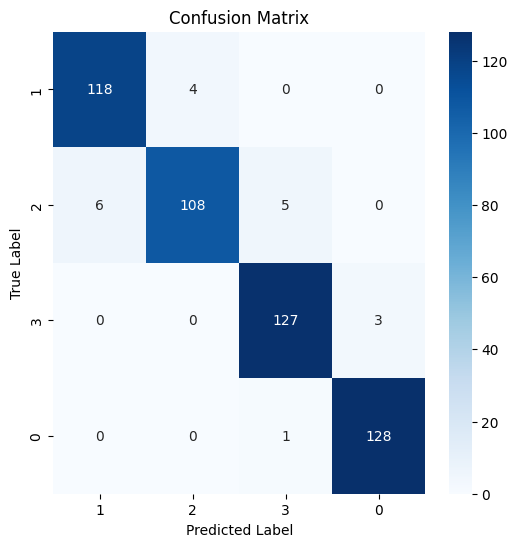

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=train_data[column].unique(), yticklabels=train_data[column].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, roc_curve

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

In [28]:
y_test_bin = label_binarize(y_test, classes=list(set(y)))

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_multinomial[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

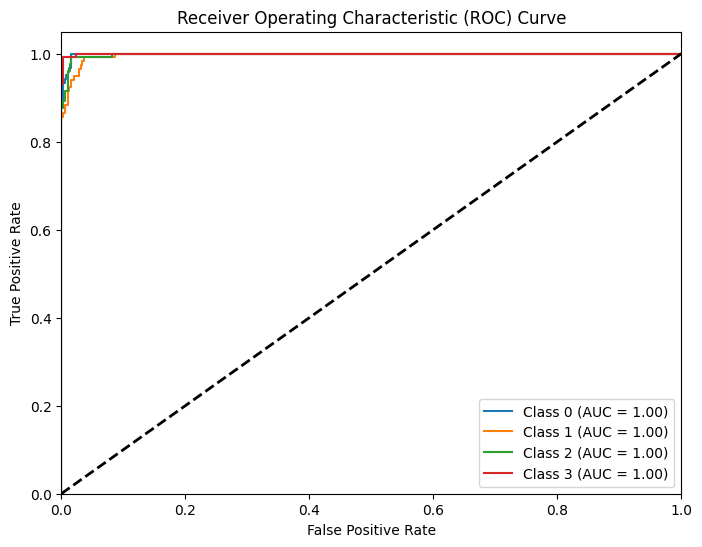

In [30]:
plt.figure(figsize=(8, 6))

for i in range(len(set(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 9. Calculating the y predicted values for the test data

In [31]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [32]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [34]:
test_data.drop(['id'],axis=1,inplace=True)

In [35]:
process_test_data=scaler.transform(test_data)

In [36]:
y_score_1=classifier_multinomial.predict(process_test_data)
y_score_1

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [37]:
y_score_df=pd.DataFrame(y_score_1)

In [38]:
test_data_1=pd.read_csv(r"/kaggle/input/dataset-for-mobile-price-prediction-multi-class/mobile_price_test.csv")

In [39]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [40]:
test_data_2=pd.concat([test_data_1['id'],y_score_df],axis=1)
test_data_2

,id,0
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [41]:
test_data_2.set_index('id',inplace=True)

In [42]:
test_data_2.head()

,0
id,
1,3
2,3
3,2
4,3
5,1


In [43]:
test_data_2.rename(columns={'0':'Predicted Y value'},inplace=True)

In [44]:
test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [45]:
test_data_2.head()

,0
id,
1,3
2,3
3,2
4,3
5,1
